In [131]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

In [132]:
#importing or loading the train dataset
dftr = pd.read_csv('Bigdatamart_train.csv')
dftr.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [133]:
#importing or loading the test dataset
dfte = pd.read_csv('Bigdatamart_test.csv')
dfte.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Train and Test datasets gievn seperately. It is necessary to explore, vizualize and analyse both datasets before building the model.

In [134]:
print('Train data: \n',dftr.columns,'\n')
print('Test data: \n',dfte.columns)

Train data: 
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object') 

Test data: 
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


Observe that 'Item_Outlet_Sales' which is the target variable to be predicted is not present in test dataset

In [135]:
#Checking for data shape
print('Train data size: \n',dftr.shape,'\n')
print('Test data size: \n',dfte.shape)

Train data size: 
 (8523, 12) 

Test data size: 
 (5681, 11)


1) 'Item_Identifier': Feature column having Product or item code

2) 'Item_Weight': Continuous type feature column having Product or item weight

3) 'Item_Fat_Content': Categorical feature column having item 

4) 'Item_Visibility': Index or factor which tells to how much extent the product or item is visble or displayed to customers
       
5) 'Item_Type': Categorical feature column having item category

6) 'Item_MRP': Feature column having Product or item price

7) 'Outlet_Identifier': Feature column having outlet code
       
8) 'Outlet_Establishment_Year': Feature column having outlet year of establishment (how much old the outlet is?)

9) 'Outlet_Size': Feature column having outlet size

10) 'Outlet_Location_Type': Feature column having outlet location type or type of area where outlet is situated

11) 'Outlet_Type': Feature column having outlet type
    
12) 'Item_Outlet_Sales': Target column showing the sales of that item in the outlet

In [136]:
#Training dataset general information
dftr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Item_Weight and Outlet_Size has NaN values which need to be handled

In [137]:
#Testing dataset general information
dfte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Item_Weight and Outlet_Size has NaN values which need to be handled

In [138]:
#Checking any null values
print('Train data: \n',dftr.isnull().sum(),'\n')
print('Test data: \n',dfte.isnull().sum())

Train data: 
 Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 

Test data: 
 Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [139]:
#Checking any blank or white spaces
np.where(dftr.applymap(lambda x: x == ' '))

(array([], dtype=int64), array([], dtype=int64))

No empty spaces present as entires in train dataset 

In [140]:
#Checking any blank or white spaces
np.where(dfte.applymap(lambda x: x == ' '))

(array([], dtype=int64), array([], dtype=int64))

No empty spaces present as entires in test dataset 

In [141]:
#Checking if all entries of a column is unique or not
df = dftr
for i in df.columns:
    print('For column of {} '.format(i),(len(df[i].unique())==len(df[i])))

For column of Item_Identifier  False
For column of Item_Weight  False
For column of Item_Fat_Content  False
For column of Item_Visibility  False
For column of Item_Type  False
For column of Item_MRP  False
For column of Outlet_Identifier  False
For column of Outlet_Establishment_Year  False
For column of Outlet_Size  False
For column of Outlet_Location_Type  False
For column of Outlet_Type  False
For column of Item_Outlet_Sales  False


In [142]:
#Checking if all entries of a column is unique or not
df = dfte
for i in df.columns:
    print('For column of {} '.format(i),(len(df[i].unique())==len(df[i])))

For column of Item_Identifier  False
For column of Item_Weight  False
For column of Item_Fat_Content  False
For column of Item_Visibility  False
For column of Item_Type  False
For column of Item_MRP  False
For column of Outlet_Identifier  False
For column of Outlet_Establishment_Year  False
For column of Outlet_Size  False
For column of Outlet_Location_Type  False
For column of Outlet_Type  False


This means values or entries in each column may be repeated and non unique

In [143]:
#Removing duplicate rows if any
print('Size before: ',dftr.shape)
dftr.drop_duplicates()
print('Size after: ',dftr.shape)

Size before:  (8523, 12)
Size after:  (8523, 12)


In [144]:
#Removing duplicate rows if any
print('Size before: ',dfte.shape)
dftr.drop_duplicates()
print('Size after: ',dfte.shape)

Size before:  (5681, 11)
Size after:  (5681, 11)


Therefore the dataset doesnot contains any duplicate rows

In [145]:
#Checking of value counts in each categorical columns
dfcat = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']
df = dftr
for i in dfcat:
    print(df[i].value_counts(),'\n')

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64 

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64 



In [146]:
#Checking of value counts in each categorical columns
dfcat = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']
df = dfte
for i in dfcat:
    print(df[i].value_counts(),'\n')

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64 

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64 

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64 

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64 

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64 



In [147]:
#Checking of value counts in each nominal and ordinal columns
dfcat = ['Item_Identifier', 'Outlet_Identifier','Outlet_Establishment_Year']
df = dftr
for i in dfcat:
    print(df[i].value_counts(),'\n')

FDW13    10
FDG33    10
FDW26     9
FDT07     9
NCY18     9
         ..
FDE52     1
FDO33     1
FDC23     1
FDQ60     1
FDK57     1
Name: Item_Identifier, Length: 1559, dtype: int64 

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64 

1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64 



In [148]:
#Checking of value counts in each nominal and ordinal columns
dfcat = ['Item_Identifier', 'Outlet_Identifier','Outlet_Establishment_Year']
df = dfte
for i in dfcat:
    print(df[i].value_counts(),'\n')

FDW10    8
FDZ50    8
FDN52    8
NCS41    8
DRF48    8
        ..
NCL29    1
FDH33    1
FDG57    1
FDU34    1
FDY49    1
Name: Item_Identifier, Length: 1543, dtype: int64 

OUT027    624
OUT013    621
OUT046    620
OUT049    620
OUT035    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64 

1985    976
1987    621
2004    620
1997    620
1999    620
2002    619
2009    618
2007    617
1998    370
Name: Outlet_Establishment_Year, dtype: int64 



In [149]:
dftr.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

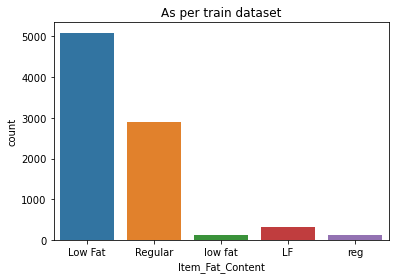

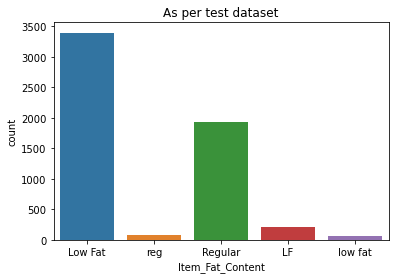

In [150]:
#Vizualization of value counts in each categorical columns
sns.countplot(dftr['Item_Fat_Content'])
plt.title('As per train dataset')
plt.show()
sns.countplot(dfte['Item_Fat_Content'])
plt.title('As per test dataset')
plt.show()

In both test and train data most of the items are of low fat type

both test and train data has similarity

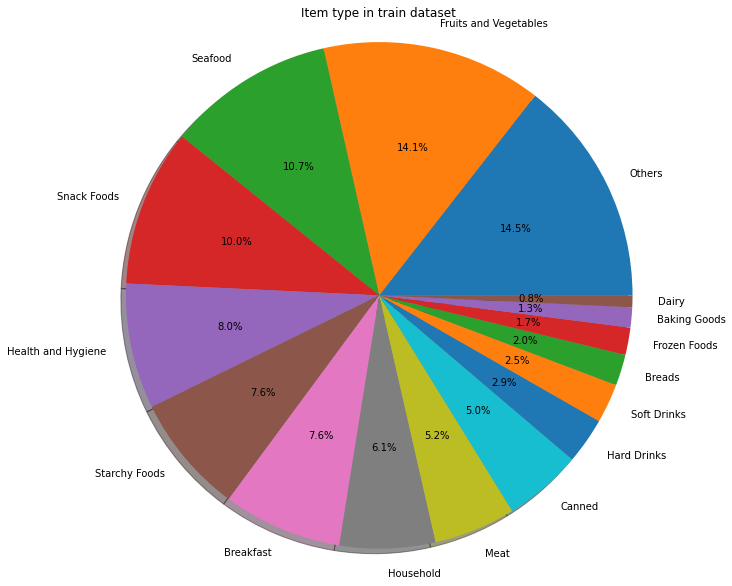

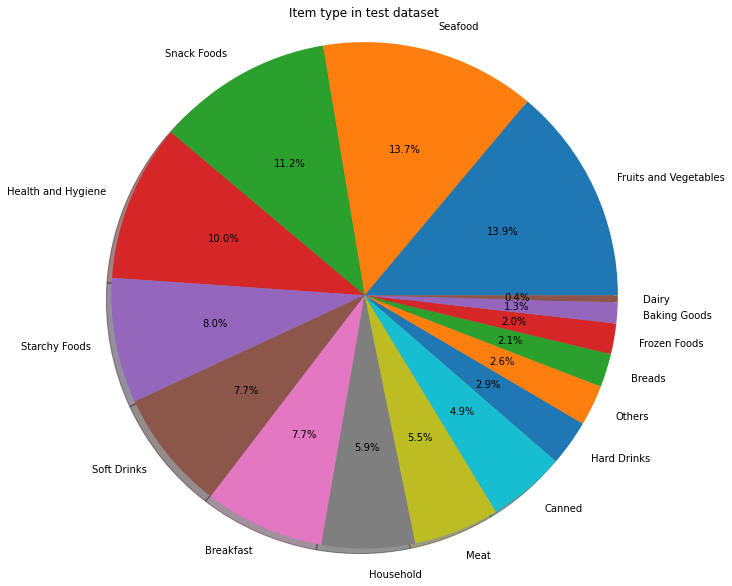

In [151]:
#Vizualization of Item type data
var = 'Item_Type'
plt.figure(figsize=(10,10))
data = list(dftr[var].value_counts())
plt.pie(data, labels= list(set(dftr[var].values)), autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Item type in train dataset')
plt.show()

var = 'Item_Type'
plt.figure(figsize=(10,10))
data = list(dfte[var].value_counts())
plt.pie(data, labels= list(set(dfte[var].values)), autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Item type in test dataset')
plt.show()

We can observe that snacks, meat, starchy food, seafood, breafast, health products constitutes majority of product or item sold type

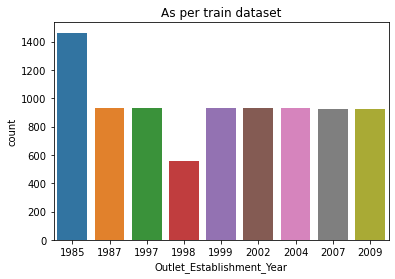

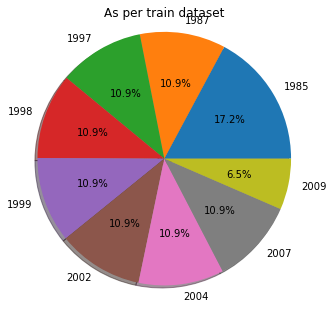

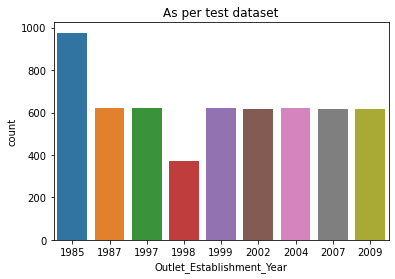

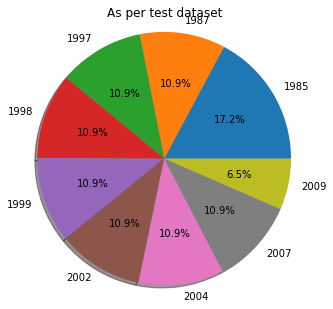

In [152]:
#Vizualization of value counts year of establishment of outlet
sns.countplot(dftr['Outlet_Establishment_Year'])
plt.title('As per train dataset')
plt.show()

var = 'Outlet_Establishment_Year'
plt.figure(figsize=(5,5))
data = list(dftr[var].value_counts())
plt.pie(data, labels= list(set(dftr[var].values)), autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('As per train dataset')
plt.show()

sns.countplot(dfte['Outlet_Establishment_Year'])
plt.title('As per test dataset')
plt.show()

var = 'Outlet_Establishment_Year'
plt.figure(figsize=(5,5))
data = list(dfte[var].value_counts())
plt.pie(data, labels= list(set(dfte[var].values)), autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('As per test dataset')
plt.show()

We can observe similar data from both test and train datasets

In 1985 most of the little more number of outlets got established

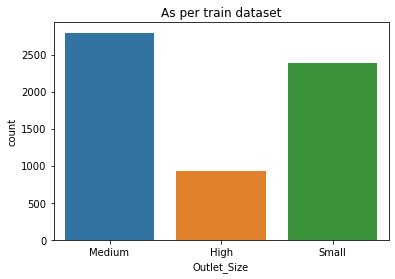

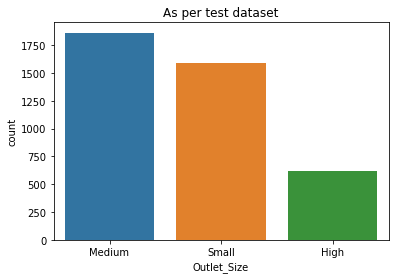

In [153]:
#Vizualization of value counts size of outlet
sns.countplot(dftr['Outlet_Size'])
plt.title('As per train dataset')
plt.show()

sns.countplot(dfte['Outlet_Size'])
plt.title('As per test dataset')
plt.show()

We can observe similarity in test and train dataset

No. of Medium size> small size > High size outlets in both datasets

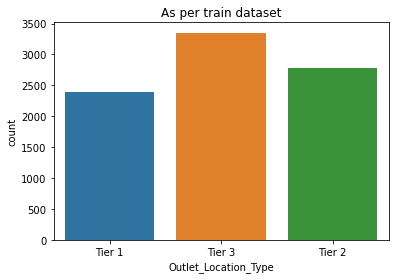

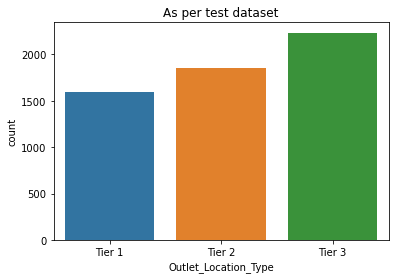

In [154]:
#Vizualization of value counts size of outlet
sns.countplot(dftr['Outlet_Location_Type'])
plt.title('As per train dataset')
plt.show()

sns.countplot(dfte['Outlet_Location_Type'])
plt.title('As per test dataset')
plt.show()

both test and train data has similarity and most number of outlets are of Tier 3

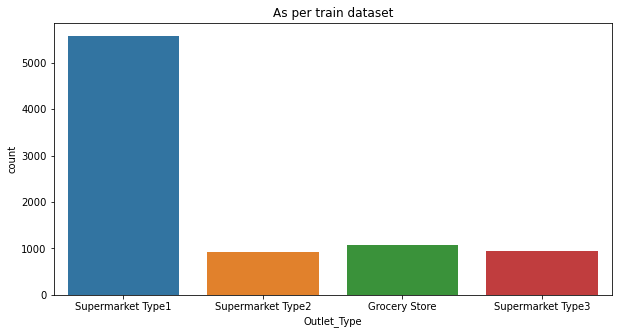

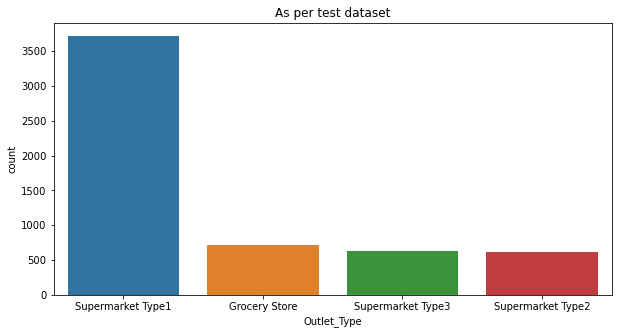

In [155]:
#Vizualization of value counts size of outlet
plt.figure(figsize=(10,5))
sns.countplot(dftr['Outlet_Type'])
plt.title('As per train dataset')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(dfte['Outlet_Type'])
plt.title('As per test dataset')
plt.show()

both test and train data has similarity. 

Supermarket type 1 is of maximum number when compared to other 3 types

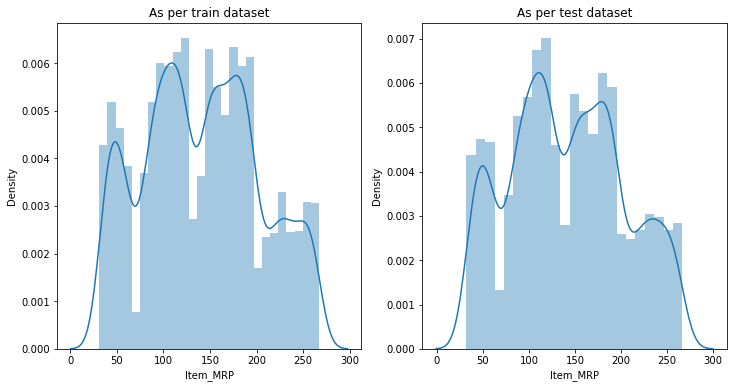

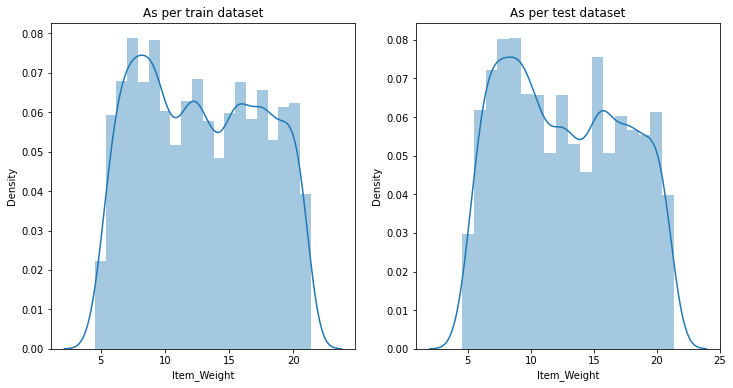

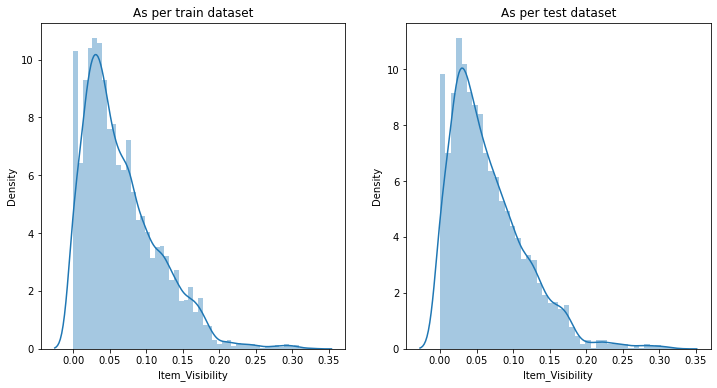

In [156]:
#Distribution plot of numerical feature columns
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.distplot(dftr['Item_MRP'], ax = ax[0])
ax[0].set_title('As per train dataset')
sns.distplot(dfte['Item_MRP'], ax = ax[1])
ax[1].set_title('As per test dataset')
plt.show()

fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.distplot(dftr['Item_Weight'], ax = ax[0])
ax[0].set_title('As per train dataset')
sns.distplot(dfte['Item_Weight'], ax = ax[1])
ax[1].set_title('As per test dataset')
plt.show()

fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.distplot(dftr['Item_Visibility'], ax = ax[0])
ax[0].set_title('As per train dataset')
sns.distplot(dfte['Item_Visibility'], ax = ax[1])
ax[1].set_title('As per test dataset')
plt.show()

Item MRP and weight data needs normalization for getting proper gaussian distribution before beuidling the model

Item visibility is having highly right skewed data, need to be handled

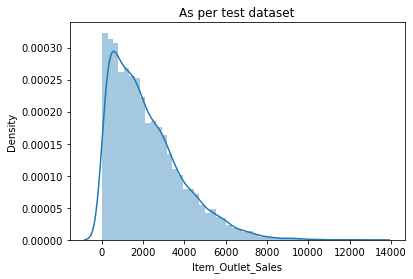

In [157]:
#Checking the distribution of target variable
sns.distplot(dftr['Item_Outlet_Sales'])
plt.title('As per test dataset')
plt.show()

Distribution of sales of item in outlet is in decreasing trend and data is highly right skewed

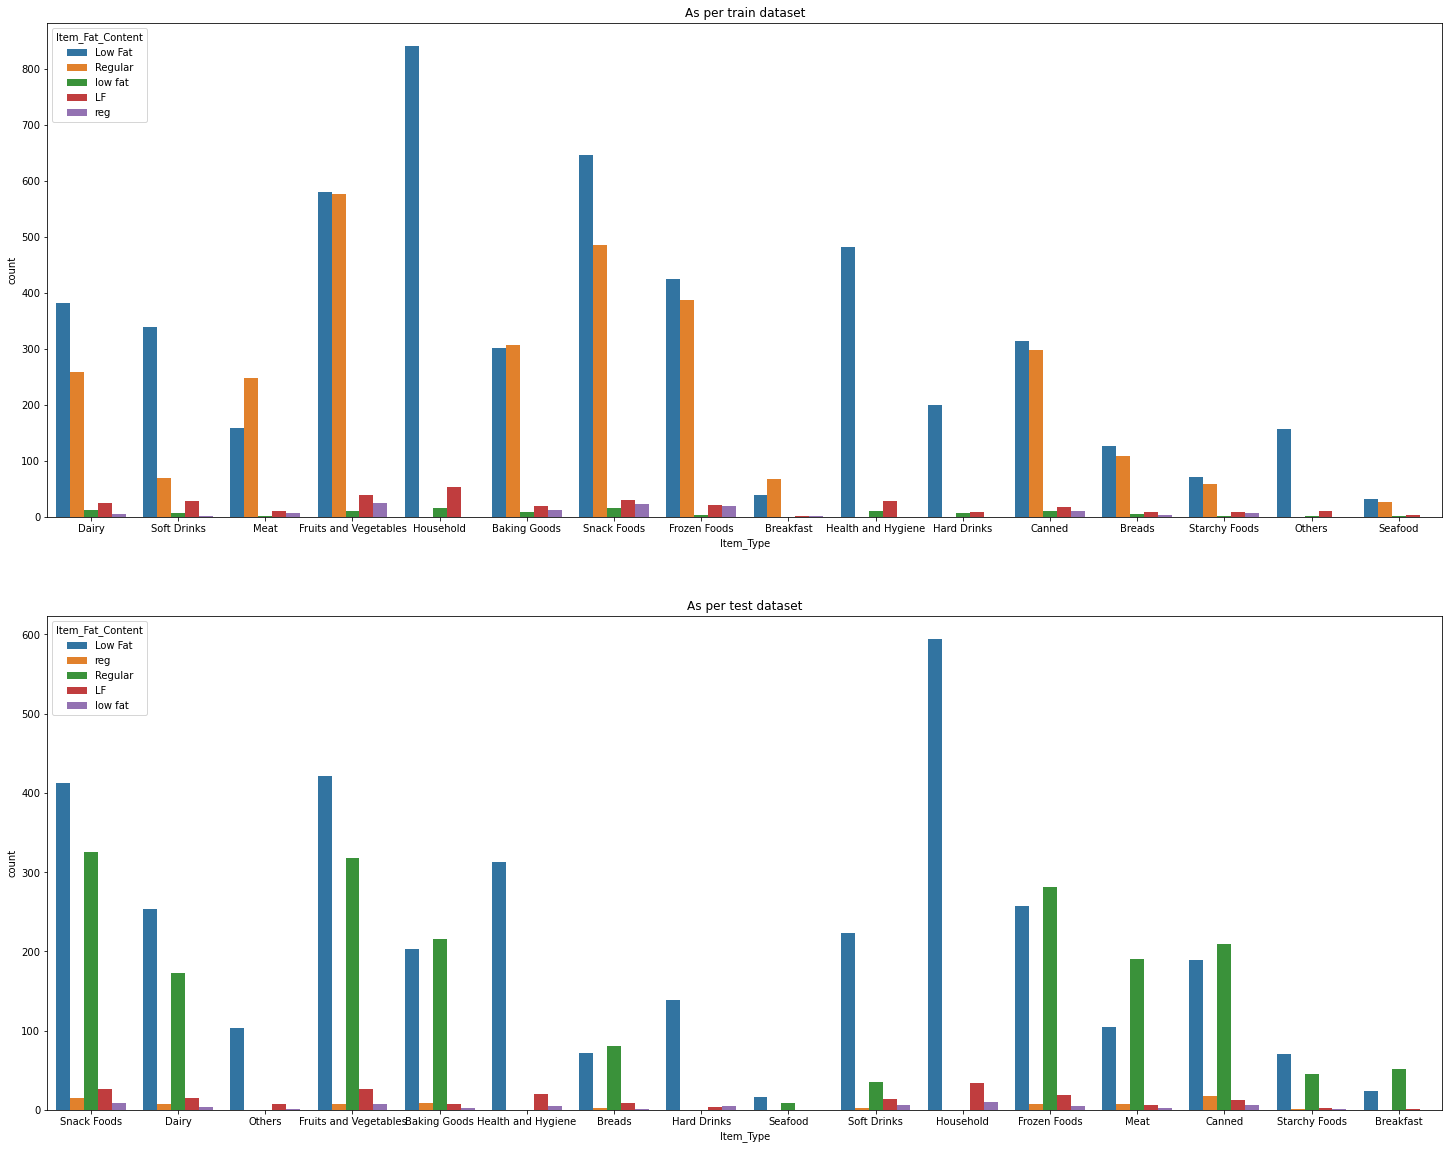

In [158]:
#Let us vizualize fat content among different item/food types
fig, ax = plt.subplots(2,1, figsize=(25,20))
sns.countplot(dftr['Item_Type'], hue = dftr['Item_Fat_Content'], ax = ax[0])
ax[0].set_title('As per train dataset')
sns.countplot(dfte['Item_Type'], hue = dfte['Item_Fat_Content'], ax = ax[1])
ax[1].set_title('As per test dataset')
plt.show()

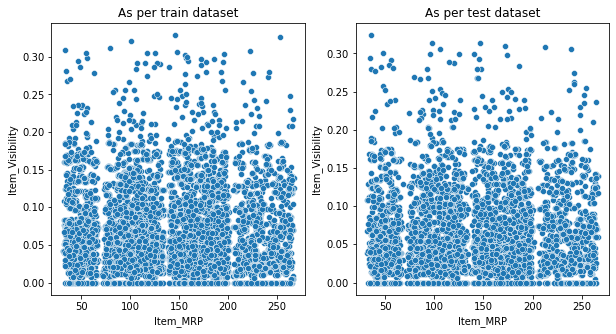

In [159]:
#Let us vizualize relation between visibility and MRP
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(y = dftr['Item_Visibility'], x = dftr['Item_MRP'], ax = ax[0])
ax[0].set_title('As per train dataset')
sns.scatterplot(y = dfte['Item_Visibility'], x = dfte['Item_MRP'], ax = ax[1])
ax[1].set_title('As per test dataset')
plt.show()

Items with MRP between 100 to 200 seems to be more in number in higher visiility range (0.15 to 0.30) comparitively

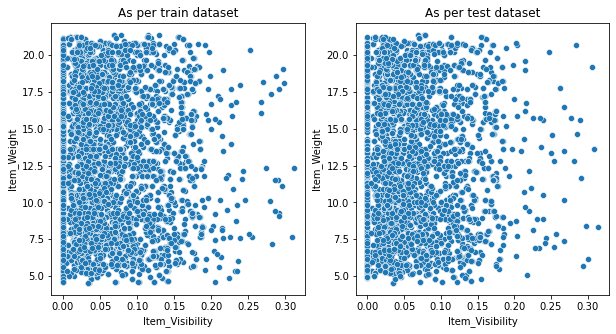

In [160]:
#Let us vizualize relation between visibility and weight
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(x = dftr['Item_Visibility'], y = dftr['Item_Weight'], ax = ax[0])
ax[0].set_title('As per train dataset')
sns.scatterplot(x = dfte['Item_Visibility'], y = dfte['Item_Weight'], ax = ax[1])
ax[1].set_title('As per test dataset')
plt.show()

No proper conclusions can be drawn from this data

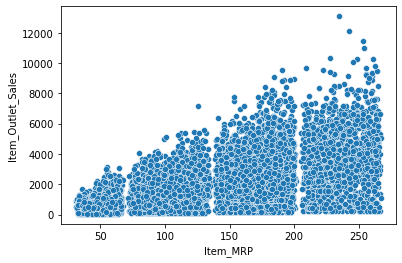

In [161]:
#Let us vizualize relation between mrp and sales
sns.scatterplot(x = dftr['Item_MRP'], y = dftr['Item_Outlet_Sales'])
plt.show()

This shows that higher thr MRP of item greater the sales

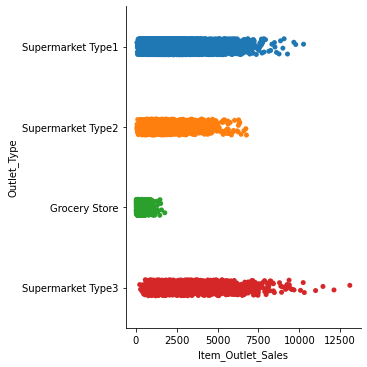

In [162]:
#Let us vizualize sales at different type of outlets
sns.catplot(y ='Outlet_Type', x ='Item_Outlet_Sales', data=dftr)
plt.show()

We can observe that sales is in order Supermarket typr 3 >  Supermarket typr 1 > Supermarket typr 1 > Grocer store 

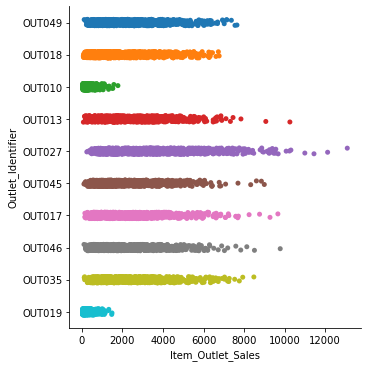

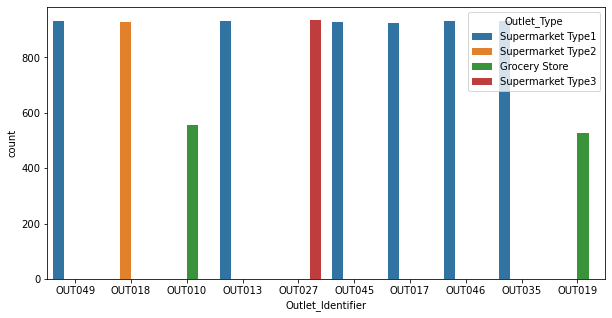

In [163]:
#Let us vizualize sales at different outlets
sns.catplot(y ='Outlet_Identifier', x ='Item_Outlet_Sales', data=dftr)
plt.show()

#Let us vizualize which and all outlets lie under which outlet types
plt.figure(figsize=(10,5))
sns.countplot(dftr['Outlet_Identifier'], hue =dftr['Outlet_Type'])
plt.show()

We can observe that sales is highest in OUT027 and least in OUT019

From second graph we can observe OUT027 outlets are of Supermaret type 3 and OUT019 outlets are Grocery store. This supports the inferences and observations drawn from first graph

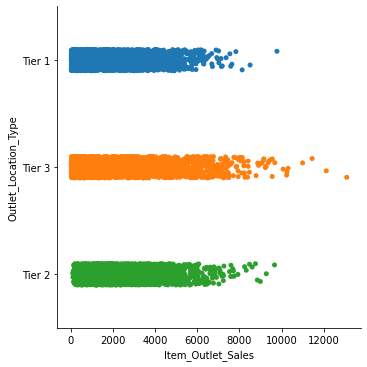

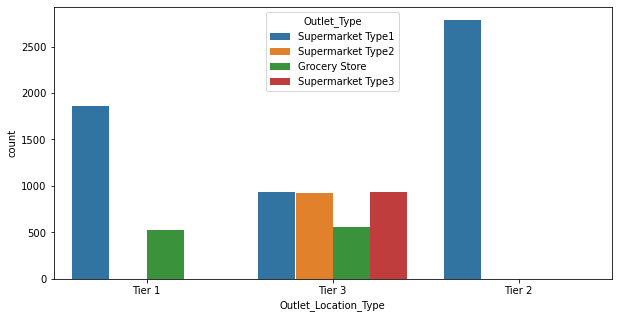

In [164]:
#Let us vizualize sales at different locations
sns.catplot(y ='Outlet_Location_Type', x ='Item_Outlet_Sales', data=dftr)
plt.show()

#Let us vizualize which and all outlets lie under which outlet types
plt.figure(figsize=(10,5))
sns.countplot(dftr['Outlet_Location_Type'], hue =dftr['Outlet_Type'])
plt.show()

Outlets at Tier 3 location is having more sales compared to other 2 types of locations

From second graph we can observe that Tier 3 location has Supermarket type 3 outlets which definitely a reason for more sales

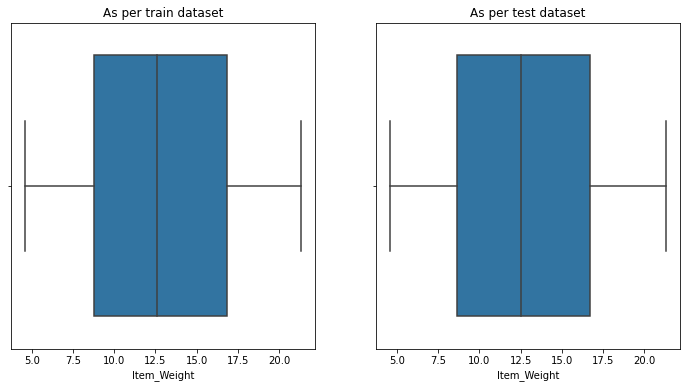

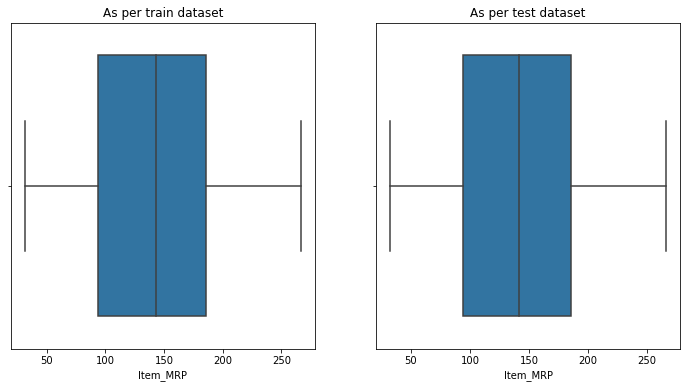

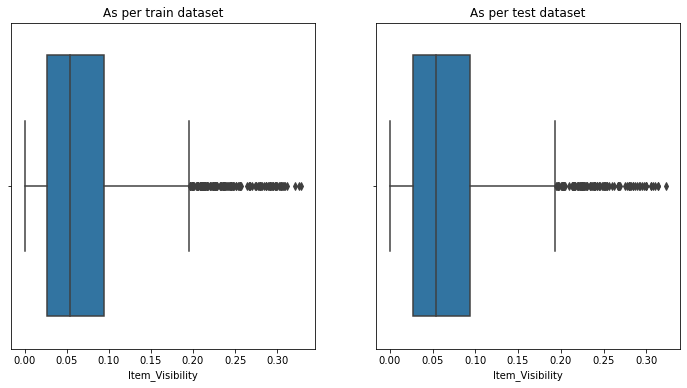

In [165]:
#Outliers checing for numerical/continuous type of feature columns

fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.boxplot(dftr['Item_Weight'], ax = ax[0])
ax[0].set_title('As per train dataset')
sns.boxplot(dfte['Item_Weight'], ax = ax[1])
ax[1].set_title('As per test dataset')
plt.show()

fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.boxplot(dftr['Item_MRP'], ax = ax[0])
ax[0].set_title('As per train dataset')
sns.boxplot(dfte['Item_MRP'], ax = ax[1])
ax[1].set_title('As per test dataset')
plt.show()

fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.boxplot(dftr['Item_Visibility'], ax = ax[0])
ax[0].set_title('As per train dataset')
sns.boxplot(dfte['Item_Visibility'], ax = ax[1])
ax[1].set_title('As per test dataset')
plt.show()

Item visibility has outliers, need to be handled before training the model

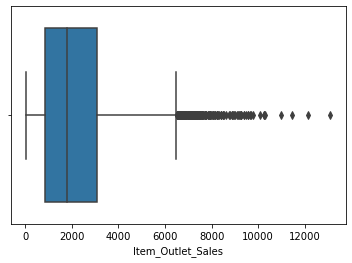

In [166]:
#Checking outliers in the target data
sns.boxplot(dftr['Item_Outlet_Sales'])
plt.show()

The target variable data is also having more noise/outliers

In [167]:
#Hadling the nan values
#Mean imputation
dftr['Item_Weight'] = dftr['Item_Weight'].fillna(dftr['Item_Weight'].mean())
dfte['Item_Weight'] = dfte['Item_Weight'].fillna(dfte['Item_Weight'].mean())

#Mode imputation
dftr['Outlet_Size'] = dftr['Outlet_Size'].fillna(dftr['Outlet_Size'].mode()[0])
dfte['Outlet_Size'] = dfte['Outlet_Size'].fillna(dfte['Outlet_Size'].mode()[0])

In [168]:
#Rechecking any null values
print('Train data: \n',dftr.isnull().sum(),'\n')
print('Test data: \n',dfte.isnull().sum())

Train data: 
 Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64 

Test data: 
 Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


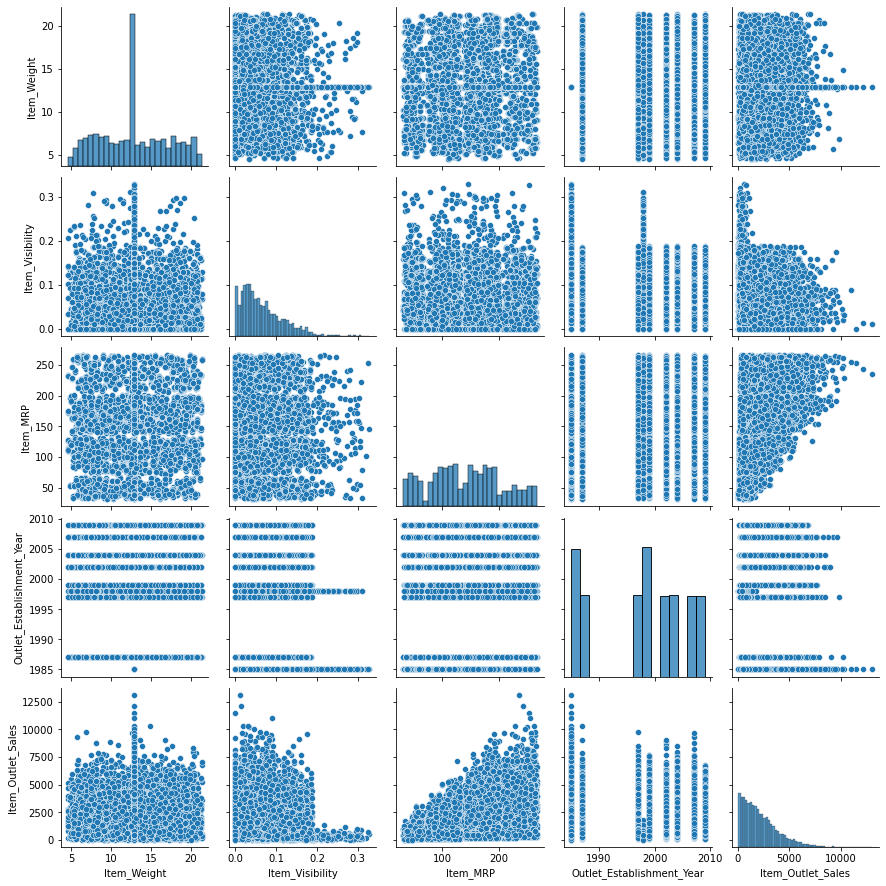

In [169]:
#Plotting all possible bivariate plots together
sns.pairplot(dftr)
plt.show()

In [170]:
#Statistical summary of the data
df = dftr.drop('Outlet_Establishment_Year', axis=1)
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.226124,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,9.310000,0.026989,93.826500,834.247400
50%,12.857645,0.053931,143.012800,1794.331000
75%,16.000000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


Normalizaion/standardization of data necessary to remove skewness

Scaling of data to make all entries/values are in same range for best perfrormance of machine learning algorithm

In [171]:
#Coefficient of correlation matrix
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.567574
Item_Outlet_Sales,0.011550,-0.128625,0.567574,1.000000


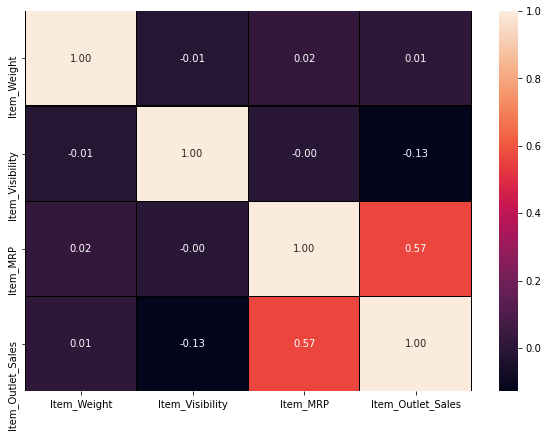

Item_Outlet_Sales    1.000000
Item_MRP             0.567574
Item_Weight          0.011550
Item_Visibility     -0.128625
Name: Item_Outlet_Sales, dtype: float64

In [172]:
#Heatmap to vizualize correlation between different continuous/numerical columns
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, linecolor='black', fmt='0.2f')
plt.show()

#Sorting descending values of correlation data of target variable
df.corr()['Item_Outlet_Sales'].sort_values(ascending=False)

The correlation of sales vs mrp is more compared to other 2 columns

In [173]:
dftr.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [174]:
#Encoding the feature columns

#Ordinal data encoding
from sklearn.preprocessing import OrdinalEncoder
ore = OrdinalEncoder()
ordinal = ['Item_Fat_Content','Outlet_Size','Outlet_Establishment_Year']
dftr[ordinal] = ore.fit_transform(dftr[ordinal])
dfte[ordinal] = ore.fit_transform(dfte[ordinal])

#Nominal data encoding
from category_encoders import BinaryEncoder
be = BinaryEncoder()
nominal = ['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Outlet_Location_Type']
dftr_add = be.fit_transform(dftr[nominal])
dftr = dftr.drop(nominal, axis=1)
dftr[dftr_add.columns] = dftr_add
dfte_add = be.fit_transform(dfte[nominal])
dfte = dfte.drop(nominal, axis=1)
dfte[dfte_add.columns] = dfte_add

In [175]:
#Checing datatypes to cross check whether encoded or not
print(dftr.dtypes)
print(dfte.dtypes)

Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year    float64
Outlet_Size                  float64
Item_Outlet_Sales            float64
Item_Identifier_0              int64
Item_Identifier_1              int64
Item_Identifier_2              int64
Item_Identifier_3              int64
Item_Identifier_4              int64
Item_Identifier_5              int64
Item_Identifier_6              int64
Item_Identifier_7              int64
Item_Identifier_8              int64
Item_Identifier_9              int64
Item_Identifier_10             int64
Item_Type_0                    int64
Item_Type_1                    int64
Item_Type_2                    int64
Item_Type_3                    int64
Item_Type_4                    int64
Outlet_Identifier_0            int64
Outlet_Identifier_1            int64
Outlet_Identifier_2            int64
Outlet_Identifier_3            int64
O

In [176]:
#Removing of outliers by zscore method
print('Shape before',dftr.shape)
from scipy.stats import zscore
z=np.abs(zscore(dftr))
dftr_new = dftr[(z<3).all(axis=1)]
print('Shape after',dftr_new.shape,'\n')

#Percentage loss of data
loss = (dftr.shape[0]-dftr_new.shape[0])*100/(dftr.shape[0])
print(loss,'% loss of data')

Shape before (8523, 32)
Shape after (8161, 32) 

4.2473307520826 % loss of data


In [177]:
#Removing of outliers by zscore method
print('Shape before',dfte.shape)
from scipy.stats import zscore
z=np.abs(zscore(dfte))
dfte_new = dfte[(z<3).all(axis=1)]
print('Shape after',dfte_new.shape,'\n')

#Percentage loss of data
loss = (dfte.shape[0]-dfte_new.shape[0])*100/(dfte.shape[0])
print(loss,'% loss of data')

Shape before (5681, 31)
Shape after (5450, 31) 

4.066185530716423 % loss of data


In [178]:
x = dftr_new.drop('Item_Outlet_Sales', axis=1)
y = dftr_new['Item_Outlet_Sales']
xtest = dfte_new
print('train x shape',x.shape)
print('train y shape',y.shape)
print('test x shape',xtest.shape)

train x shape (8161, 31)
train y shape (8161,)
test x shape (5450, 31)


In [179]:
#VIF method to check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif

[1.0115296029761065,
 1.015537971546045,
 1.0523762043342475,
 1.0182970682047923,
 inf,
 inf,
 1.263320830537341,
 1.257013037749367,
 1.0057204452490887,
 1.0041566729843818,
 1.005642465241047,
 1.0069701974809209,
 1.0069283781171914,
 1.0069475552791838,
 1.002511542149176,
 1.0046006744721228,
 1.0049442839154408,
 nan,
 1.2384323941853919,
 1.1241985292835621,
 1.0470118629912035,
 1.1314396451893785,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf]

VIF value is inf for many columns, so need to handle multicollinearity

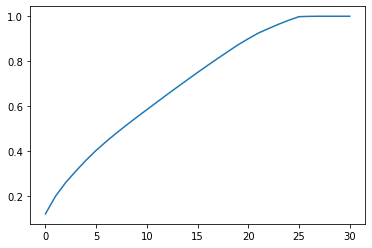

In [180]:
#PCA technique to handle multicollinearity

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
x_new = scaler.fit_transform(x)
pca = PCA()
pca.fit_transform(x_new)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

Above graph is saturating for 25 components

In [181]:
pca = PCA(n_components=25)
new = pca.fit_transform(x_new)
PC = pd.DataFrame(new, columns=range(0,25))
x = PC

vif = pd.DataFrame()
vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif

[1.0,
 1.0,
 1.0,
 0.9999999999999998,
 1.0,
 1.0,
 1.0,
 0.9999999999999998,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999999999998,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0000000000000002,
 1.0,
 1.0000000000000002,
 1.0]

VIF values are within range <5, so multicollinearity problem resolved

In [182]:
#Need to keep final test data in the same form, so apply PCA on that also
pca = PCA(n_components=25)
new = pca.fit_transform(xtest)
PC = pd.DataFrame(new, columns=range(0,25))
xtest = PC

In [183]:
#Checking skewness of continuous feature data columns
print('train data: \n',x.skew(),'\n')
print('test data: \n',xtest.skew())

train data: 
 0    -0.164394
1     0.350050
2     0.169967
3     0.277328
4    -0.015362
5     0.352546
6     0.004558
7     0.087025
8     0.005984
9     0.006653
10    0.051288
11    0.047801
12   -0.005349
13    0.001964
14   -0.068377
15    0.006007
16    0.057508
17    0.027775
18    0.085787
19    0.091950
20    0.174490
21    0.821139
22   -0.238631
23    0.173743
24   -0.331811
dtype: float64 

test data: 
 0     0.131887
1     0.135833
2     0.032467
3     0.497619
4    -0.051785
5     0.165481
6     0.669439
7     0.155857
8     0.001962
9     0.050919
10   -0.096744
11    0.012316
12   -0.026823
13   -0.043658
14   -0.060739
15    0.037462
16    0.030744
17   -0.019831
18    0.009712
19    0.024890
20    0.300402
21    1.957291
22   -0.247573
23   -0.367426
24    0.607080
dtype: float64


Skewness should be within limit +-0.5 so there is a need of applying transformation

In [184]:
#Apply power transform to transform data
from sklearn.preprocessing import PowerTransformer
po = PowerTransformer()
x_new = po.fit_transform(x)
x_new = pd.DataFrame(x_new, columns=x.columns)
xtest_new = po.fit_transform(xtest)
xtest_new = pd.DataFrame(xtest_new, columns=xtest.columns)
x = x_new
xtest = xtest_new
print('train data: \n',x.skew(),'\n')
print('test data: \n',xtest.skew())

train data: 
 0     0.026036
1    -0.031373
2     0.057539
3     0.004727
4     0.005340
5     0.026630
6    -0.008224
7     0.000625
8     0.002095
9     0.006158
10   -0.000378
11    0.000181
12    0.000449
13   -0.001059
14    0.008741
15    0.002828
16    0.002458
17    0.012407
18    0.009219
19   -0.003743
20   -0.010492
21    0.014266
22    0.029309
23    0.008871
24   -0.008164
dtype: float64 

test data: 
 0     0.041817
1     0.008913
2     0.016358
3     0.006035
4     0.003441
5    -0.006211
6     0.131558
7     0.003005
8    -0.009496
9     0.002955
10   -0.004930
11   -0.000169
12    0.002110
13   -0.001800
14   -0.002070
15    0.002284
16   -0.000205
17    0.000272
18    0.001651
19    0.003996
20   -0.009368
21    0.082188
22    0.047842
23   -0.118289
24    0.239829
dtype: float64


Skewness is within limit +-0.5, so we can proceed

In [228]:
xtr = x
ytr = y
xt = xtest

In [245]:
# Linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
model = LinearRegression()
model.fit(xtr,ytr)
predytr = model.predict(xtr)
print('Train score =',(r2_score(ytr,predytr)))
print('Mean absolute error =',(mean_absolute_error(ytr,predytr)))
print('Root mean squared error =',np.sqrt(mean_squared_error(ytr,predytr)))

Train score = 0.5009661248532422
Mean absolute error = 857.8508501178343
Root mean squared error = 1115.9207152164815


In [246]:
#Cross validation to check overfitting
from sklearn.model_selection import cross_val_score
print('r2_score of training =',r2_score(ytr, predytr),'\n')
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,xtr,ytr,cv=i)
    print('At CV =',i)
    print('CV score =',lsc.mean(),'\n')
    CVS.append(lsc.mean()) 
difference = min(CVS - r2_score(ytr, predytr))
print('Least diff beteen r2score and CV score =',difference)

r2_score of training = 0.5009661248532422 

At CV = 2
CV score = 0.49404525433808616 

At CV = 3
CV score = 0.49580797123849535 

At CV = 4
CV score = 0.495463972433577 

At CV = 5
CV score = 0.4961617196147694 

At CV = 6
CV score = 0.497314534765213 

At CV = 7
CV score = 0.4975222504866953 

At CV = 8
CV score = 0.49676491980016724 

At CV = 9
CV score = 0.49672296461040844 

At CV = 10
CV score = 0.4967440592978091 

Least diff beteen r2score and CV score = -0.006920870515156052


At cv=7, least difference between cv score and r2 score occured. Difference = 0.0069

In [247]:
# Lasso regression
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(xtr,ytr)
predytr = model.predict(xtr)
print('Train score =',(r2_score(ytr,predytr)))
print('Mean absolute error =',(mean_absolute_error(ytr,predytr)))
print('Root mean squared error =',np.sqrt(mean_squared_error(ytr,predytr)))

Train score = 0.5009560563392583
Mean absolute error = 857.7463377828172
Root mean squared error = 1115.9319725751636


In [248]:
#Hyperparameter tuning of Lasso model
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[0.01,0.1, 1, 10], 
              'random_state':list(range(50,500,5)), 
              'selection':['cyclic', 'random'],
              'max_iter':[100,200,300]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

Lasso(alpha=1, max_iter=100, random_state=385, selection='random')


In [249]:
#Trainig model as per best parameters
model = Lasso(alpha=1, max_iter=100, random_state=385, selection='random')
model.fit(xtr,ytr)
predytr = model.predict(xtr)
print('Train score =',(r2_score(ytr,predytr)))
print('Mean absolute error =',(mean_absolute_error(ytr,predytr)))
print('Root mean squared error =',np.sqrt(mean_squared_error(ytr,predytr)))

#Cross validation to check overfitting
from sklearn.model_selection import cross_val_score
print('r2_score of training =',r2_score(ytr, predytr),'\n')
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,xtr,ytr,cv=i)
    print('At CV =',i)
    print('CV score =',lsc.mean(),'\n')
    CVS.append(lsc.mean()) 
difference = min(CVS - r2_score(ytr, predytr))
print('Least diff beteen r2score and CV score =',difference)

Train score = 0.5009561515759371
Mean absolute error = 857.7469558970328
Root mean squared error = 1115.9318660938993
r2_score of training = 0.5009561515759371 

At CV = 2
CV score = 0.4940356806544048 

At CV = 3
CV score = 0.4958019332640518 

At CV = 4
CV score = 0.49545683967969434 

At CV = 5
CV score = 0.4961647598749536 

At CV = 6
CV score = 0.4973094090117655 

At CV = 7
CV score = 0.497525883949944 

At CV = 8
CV score = 0.4967667220148412 

At CV = 9
CV score = 0.496720849418891 

At CV = 10
CV score = 0.4967423526629465 

Least diff beteen r2score and CV score = -0.006920470921532307


At cv=7, least difference between cv score and r2 score occured. Difference = 0.0069

In [250]:
# Ridge regression
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(xtr,ytr)
predytr = model.predict(xtr)
print('Train score =',(r2_score(ytr,predytr)))
print('Mean absolute error =',(mean_absolute_error(ytr,predytr)))
print('Root mean squared error =',np.sqrt(mean_squared_error(ytr,predytr)))

Train score = 0.5009661175540633
Mean absolute error = 857.8455643629974
Root mean squared error = 1115.9207233775558


In [251]:
#Hyperparameter tuning of Ridge model
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[0.01,0.1, 1, 10], 
              'random_state':range(50,500,5), 
              'solver':['auto', 'svd', 'cholesky'],
              'max_iter':[100,200,300]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

Ridge(alpha=10, max_iter=100, random_state=50)


In [252]:
#Trainig model as per best parameters
model = Ridge(alpha=10, max_iter=100, random_state=50)
model.fit(xtr,ytr)
predytr = model.predict(xtr)
print('Train score =',(r2_score(ytr,predytr)))
print('Mean absolute error =',(mean_absolute_error(ytr,predytr)))
print('Root mean squared error =',np.sqrt(mean_squared_error(ytr,predytr)))

#Cross validation to check overfitting
from sklearn.model_selection import cross_val_score
print('r2_score of training =',r2_score(ytr, predytr),'\n')
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i)
    print('CV score =',lsc.mean(),'\n')
    CVS.append(lsc.mean()) 
difference = min(CVS - r2_score(ytr, predytr))
print('Least diff beteen r2score and CV score =',difference)

Train score = 0.5009653965279621
Mean absolute error = 857.7990130788462
Root mean squared error = 1115.9215295429346
r2_score of training = 0.5009653965279621 

At CV = 2
CV score = 0.49407237142476856 

At CV = 3
CV score = 0.4958238636264713 

At CV = 4
CV score = 0.4954776900818585 

At CV = 5
CV score = 0.4961712906583314 

At CV = 6
CV score = 0.49732173869559504 

At CV = 7
CV score = 0.49752902079049427 

At CV = 8
CV score = 0.49677232488278106 

At CV = 9
CV score = 0.49672937798894945 

At CV = 10
CV score = 0.496751184995741 

Least diff beteen r2score and CV score = -0.006893025103193562


At CV = 7, R2 score almost equal to CV score (difference = 0.00689)

In [253]:
# Gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(xtr,ytr)
predytr = model.predict(xtr)
print('Train score =',(r2_score(ytr,predytr)))
print('Mean absolute error =',(mean_absolute_error(ytr,predytr)))
print('Root mean squared error =',(np.sqrt(mean_squared_error(ytr,predytr))))

Train score = 0.6208011967295715
Mean absolute error = 730.0014203729573
Root mean squared error = 972.7512668182763


In [ ]:
#Hyperparameter tuning of GBR model
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['friedman_mse', 'squared_error', 'mae','mse'],
              'n_estimators':[100,150,200], 
              'max_depth' : [4,6,8]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

#Trainig model as per best parameters
model = gsv.best_estimator_
model.fit(xtr,ytr)
predytr = model.predict(xtr)
print('Test score =',(r2_score(ytr,predytr)))
print('Mean absolute error =',(mean_absolute_error(ytr,predytr)))
print('Root mean squared error =',np.sqrt(mean_squared_error(ytr,predytr)))

As hyperparameter tuning of GBR model taking too much time, let us skip and proceed for CV

In [254]:
#Cross validation to check overfitting
from sklearn.model_selection import cross_val_score
print('r2_score of train =',r2_score(ytr, predytr),'\n')
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,xtr,ytr,cv=i)
    print('At CV =',i)
    print('CV score =',lsc.mean(),'\n')
    CVS.append(lsc.mean())
difference = min(CVS - r2_score(ytr, predytr))
print('Least diff beteen r2score and CV score =',difference)

r2_score of train = 0.6208011967295715 

At CV = 2
CV score = 0.5327957381068843 

At CV = 3
CV score = 0.5376036530556201 

At CV = 4
CV score = 0.5404516730002092 

At CV = 5
CV score = 0.5407438064033856 

At CV = 6
CV score = 0.5402682647994239 

At CV = 7
CV score = 0.5429948041287533 

At CV = 8
CV score = 0.5402587946237365 

At CV = 9
CV score = 0.5404208121790678 

At CV = 10
CV score = 0.5414308384585763 

Least diff beteen r2score and CV score = -0.08800545862268716


At CV = 7, R2 score not equal to CV score (difference = 0.088). Difference is very large. Model is overfitting

In [255]:
#Random forest regressor model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(xtr,ytr)
predytr = model.predict(xtr)
print('Train score =',(r2_score(ytr,predytr)))
print('Mean absolute error =',(mean_absolute_error(ytr,predytr)))
print('Root mean squared error =',(np.sqrt(mean_squared_error(ytr,predytr))))

Train score = 0.9336037538473798
Mean absolute error = 299.19001407793166
Root mean squared error = 407.04281133550745


In [ ]:
#Hyperparameter tuning of RFR model
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[50,100,150], 
              'criterion':["squared_error", "absolute_error", "poisson"], 
              'max_depth':[2,4,6,8,10], 
              'max_features' : ["auto", "sqrt", "log2"]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

#Trainig model as per best parameters
model = gsv.best_estimator_
model.fit(xtr,ytr)
print('Train score =',(r2_score(ytr,predytr)))
print('Mean absolute error =',(mean_absolute_error(ytr,predytr)))
print('Root mean squared error =',np.sqrt(mean_squared_error(ytr,predytr)))

As hyperparameter tuning of RFR model taking too much time, let us skip and proceed for CV

In [257]:
#Cross validation to check overfitting
from sklearn.model_selection import cross_val_score
print('r2_score of train =',r2_score(ytr, predytr),'\n')
CVS = []
for i in range(4,9):
    lsc = cross_val_score(model,xtr,ytr,cv=i)
    print('At CV =',i)
    print('CV score =',lsc.mean(),'\n')
    CVS.append(lsc.mean())
difference = min(CVS - r2_score(ytr, predytr))
print('Least diff beteen r2score and CV score =',difference)

r2_score of train = 0.9336037538473798 

At CV = 4
CV score = 0.5172290000982938 

At CV = 5
CV score = 0.5221097392543712 

At CV = 6
CV score = 0.5217536477468956 

At CV = 7
CV score = 0.5232991990439823 

At CV = 8
CV score = 0.5194740645469151 

Least diff beteen r2score and CV score = -0.41637475374908606


At CV = 7, R2 score not equal to CV score (difference = 0.41). Difference is very large. The model is overfitting

In [258]:
#Best model as per least difference between R2score and CV score is Ridge regression model

#Trainig model as per best parameters
model = Ridge(alpha=10, max_iter=100, random_state=50)
model.fit(xtr,ytr)
predytr = model.predict(xtr)
print('Train score =',(r2_score(ytr,predytr)))
print('Mean absolute error =',(mean_absolute_error(ytr,predytr)))
print('Root mean squared error =',np.sqrt(mean_squared_error(ytr,predytr)))

#Cross validation to check overfitting
from sklearn.model_selection import cross_val_score
print('r2_score of training =',r2_score(ytr, predytr),'\n')
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    print('At CV =',i)
    print('CV score =',lsc.mean(),'\n')
    CVS.append(lsc.mean()) 
difference = min(CVS - r2_score(ytr, predytr))
print('Least diff beteen r2score and CV score =',difference)

Train score = 0.5009653965279621
Mean absolute error = 857.7990130788462
Root mean squared error = 1115.9215295429346
r2_score of training = 0.5009653965279621 

At CV = 2
CV score = 0.49407237142476856 

At CV = 3
CV score = 0.4958238636264713 

At CV = 4
CV score = 0.4954776900818585 

At CV = 5
CV score = 0.4961712906583314 

At CV = 6
CV score = 0.49732173869559504 

At CV = 7
CV score = 0.49752902079049427 

At CV = 8
CV score = 0.49677232488278106 

At CV = 9
CV score = 0.49672937798894945 

At CV = 10
CV score = 0.496751184995741 

Least diff beteen r2score and CV score = -0.006893025103193562


In [261]:
table = pd.DataFrame()
yt = model.predict(xt)
table['Predicted sales'] = yt
table.head(10)

,Predicted sales
0,143.328325
1,1955.728575
2,1923.470127
3,1832.723502
4,2060.437667
5,2216.261392
6,1787.958458
7,1006.351931
8,2828.434459
9,1025.184862


In [262]:
import pickle
filename='bigdata.pkl'
pickle.dump(model,open(filename,'wb'))